In [63]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import d2d
import importlib
importlib.reload(d2d)

import matplotlib.pyplot as plt
from datetime import datetime
import pickle as pkl
import json

Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/20
900/900 [==============================] - 121s 133ms/step - loss: 0.0891 - mean_absolute_error: 0.1971 - val_loss: 0.8405 - val_mean_absolute_error: 0.7205
Epoch 2/20
900/900 [==============================] - 119s 132ms/step - loss: 0.0199 - mean_absolute_error: 0.1007 - val_loss: 0.8464 - val_mean_absolute_error: 0.7029
Epoch 3/20
900/900 [==============================] - 120s 133ms/step - loss: 0.0137 - mean_absolute_error: 0.0818 - val_loss: 0.9403 - val_mean_absolute_error: 0.7642
Epoch 4/20
44/44 [==============================] - 10s 65ms/step - loss: 0.9889 - mean_absolute_error: 0.8128
Done with fold: 0
Epoch 1/20
900/900 [==============================] - 125s 136ms/step - loss: 0.0364 - mean_absolute_error: 0.1204 - val_loss: 0.7849 - val_mean_absolute_error: 0.7116
Epoch 2/20
900/900 [==============================] - 122s 135ms/step - loss: 0.0084 - mean_absolute_error: 0.0658 - val_loss: 0.8822 - val_mea

Epoch 4/20
822/822 [==============================] - 117s 142ms/step - loss: 0.0045 - mean_absolute_error: 0.0480 - val_loss: 0.5320 - val_mean_absolute_error: 0.5160
Epoch 5/20
822/822 [==============================] - 118s 143ms/step - loss: 0.0044 - mean_absolute_error: 0.0473 - val_loss: 0.5425 - val_mean_absolute_error: 0.5217
Epoch 6/20
822/822 [==============================] - 118s 142ms/step - loss: 0.0043 - mean_absolute_error: 0.0468 - val_loss: 0.5507 - val_mean_absolute_error: 0.5246
Epoch 7/20
91/91 [==============================] - 14s 66ms/step - loss: 0.5516 - mean_absolute_error: 0.5279
Done with fold: 0
Epoch 1/20
822/822 [==============================] - 117s 140ms/step - loss: 0.0050 - mean_absolute_error: 0.0505 - val_loss: 0.4774 - val_mean_absolute_error: 0.4817
Epoch 2/20
822/822 [==============================] - 116s 140ms/step - loss: 0.0049 - mean_absolute_error: 0.0504 - val_loss: 0.5030 - val_mean_absolute_error: 0.4942
Epoch 3/20
822/822 [===========

Epoch 7/20
509/509 [==============================] - 92s 179ms/step - loss: 0.0083 - mean_absolute_error: 0.0671 - val_loss: 0.2775 - val_mean_absolute_error: 0.3805
Epoch 8/20
509/509 [==============================] - 91s 179ms/step - loss: 0.0080 - mean_absolute_error: 0.0659 - val_loss: 0.2767 - val_mean_absolute_error: 0.3801
Epoch 9/20
509/509 [==============================] - 92s 179ms/step - loss: 0.0078 - mean_absolute_error: 0.0650 - val_loss: 0.2762 - val_mean_absolute_error: 0.3796
Epoch 10/20
509/509 [==============================] - 91s 178ms/step - loss: 0.0077 - mean_absolute_error: 0.0642 - val_loss: 0.2761 - val_mean_absolute_error: 0.3795
Epoch 11/20
509/509 [==============================] - 92s 180ms/step - loss: 0.0075 - mean_absolute_error: 0.0636 - val_loss: 0.2762 - val_mean_absolute_error: 0.3797
Epoch 12/20
509/509 [==============================] - 91s 178ms/step - loss: 0.0074 - mean_absolute_error: 0.0630 - val_loss: 0.2763 - val_mean_absolute_error: 0.

<ipython-input-64-a90e24aefded>:39: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


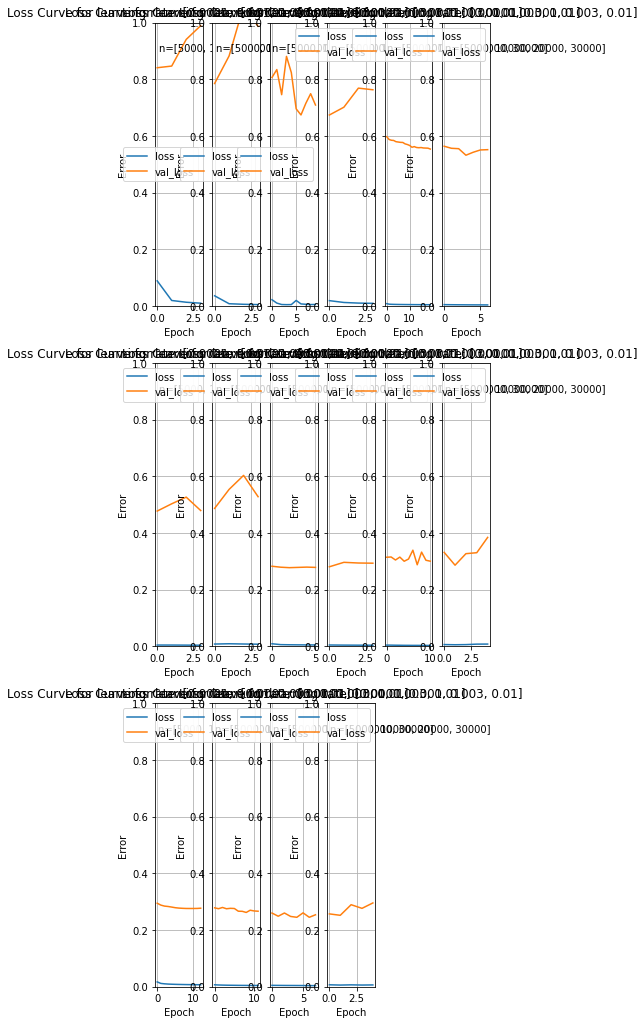

In [64]:


# Load the model definitions and datasets
linear_model, lstm_model, dnn_model, df_all_chan,input_columns  = d2d.import_data()
# names = ('Multistep_Linear','Multistep_DNN','Multistep_LSTM')
names = ('Multistep_LSTM')
models = [lstm_model]

n = [5000,10000,20000,30000] # The size of the validation set in each fold.
learning_rate = [0.0001, 0.001, 0.003, 0.01]

'''
Run the analysis

'''



a=1
k=0
fig = plt.figure(figsize=(6,24), facecolor='w', edgecolor='k')
for chunk in n:
    for lr in learning_rate:

        val_performance, performance, history, history_dict \
            = d2d.k_fold(chunk,names,models,df_all_chan,input_columns,early_stop = 1, window_input_width = 200, learning_rate = lr)

        plt.subplot(4, 6, a)
        plt.clf
        plt.plot(history_dict['M_fold'+str(k)+'_loss'], label='loss')
        plt.plot(history_dict['M_fold'+str(k)+'_val_loss'], label='val_loss')
        plt.ylim([0,1])
        plt.xlabel('Epoch')
        plt.ylabel('Error')
        plt.legend()
        plt.grid(True)
        plt.annotate('n='+str(n), (.1,.9))
        plt.title("Loss Curve for learning rate: "+str(learning_rate))
        a += 1

plt.tight_layout()  
plt.show()

In [35]:
# import matplotlib.pyplot as plt


# fig = plt.figure(figsize=(6,6), facecolor='w', edgecolor='k')

# plt.plot(history_dict['M_fold'+str(0)+'_loss'], label='loss')
# plt.plot(history_dict['M_fold'+str(0)+'_val_loss'], label='val_loss')
# plt.ylim([0, 1.3])
# plt.xlabel('Epoch')
# plt.ylabel('Error')
# plt.legend()
# plt.grid(True)
# plt.title("Loss Curve LSTM, 1 Fold")
# plt.show()